In [9]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
from evaluate_model import evaluate_model, get_data, plot_accuracy, plot_loss
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
shape, classes, data = get_data()
train_data, val_data, test_data = data

Found 2392 files belonging to 2 classes.
Using 1914 files for training.
Found 2392 files belonging to 2 classes.
Using 478 files for validation.
Found 597 files belonging to 2 classes.


In [3]:
inputs = Input(shape=shape)
pre_trained_resnet_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', classifier_activation=None, classes=len(classes), pooling='average')

for layer in pre_trained_resnet_model.layers:
    layer.trainable = False
    layer1 = pre_trained_resnet_model(inputs)
    layer2 = Flatten()(layer1)
    layer3 = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(layer2)
    outputs = Dense(len(classes), activation='softmax')(layer3)
    resnet_model = Model(inputs=inputs, outputs=outputs)

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()

Model: "model_174"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 flatten_174 (Flatten)       (None, 73728)             0         
                                                                 
 dense_348 (Dense)           (None, 32)                2359328   
                                                                 
 dense_349 (Dense)           (None, 2)                 66        
                                                                 
Total params: 25947106 (98.98 MB)
Trainable params: 2359394 (9.00 MB)
Non-trainable params: 23587712 (89.98 MB)
___________

In [4]:
resnet_model_hist = resnet_model.fit(
  train_data,
  validation_data=val_data,
  epochs=10
)

Epoch 1/10
60/60 [==============================] - 66s 1s/step - loss: 1.1798 - accuracy: 0.8746 - val_loss: 0.4292 - val_accuracy: 0.9812
Epoch 2/10
60/60 [==============================] - 65s 1s/step - loss: 0.3078 - accuracy: 0.9927 - val_loss: 0.2414 - val_accuracy: 0.9958
Epoch 3/10
60/60 [==============================] - 65s 1s/step - loss: 0.1833 - accuracy: 1.0000 - val_loss: 0.1719 - val_accuracy: 0.9937
Epoch 4/10
60/60 [==============================] - 65s 1s/step - loss: 0.1292 - accuracy: 0.9990 - val_loss: 0.1254 - val_accuracy: 0.9937
Epoch 5/10
60/60 [==============================] - 65s 1s/step - loss: 0.1031 - accuracy: 0.9953 - val_loss: 0.1170 - val_accuracy: 0.9916
Epoch 6/10
60/60 [==============================] - 66s 1s/step - loss: 0.0765 - accuracy: 0.9995 - val_loss: 0.0815 - val_accuracy: 0.9958
Epoch 7/10
60/60 [==============================] - 65s 1s/step - loss: 0.0581 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 0.9937
Epoch 8/10
60/60 [==

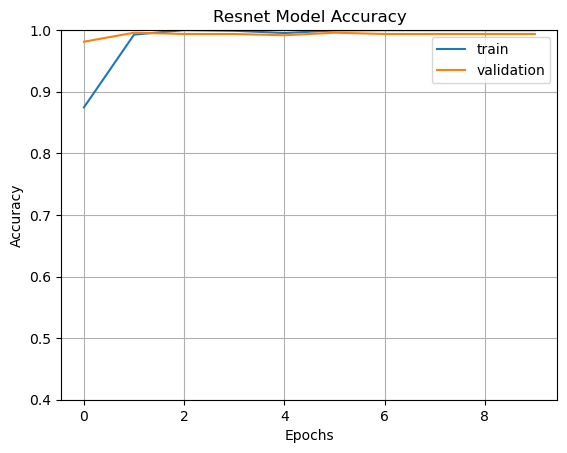

In [5]:
plot_accuracy(resnet_model_hist, "Resnet Model")

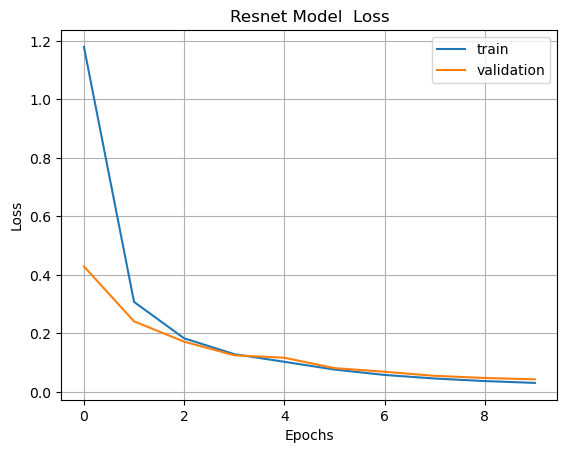

In [6]:
plot_loss(resnet_model_hist, "Resnet Model")

1/1 [==============================] - 1s 1s/step


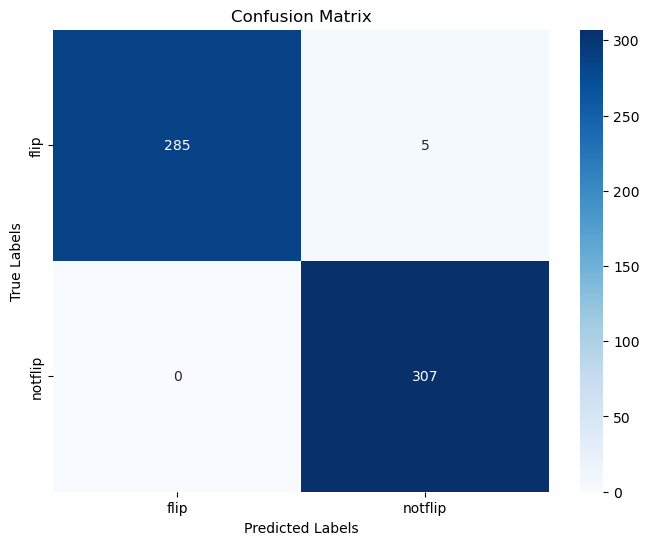

{'accuracy': 0.9916247906197655, 'f1_score': 0.9919224555735056}

In [7]:
evaluate_model(resnet_model, test_data)

In [8]:
resnet_model_path = '../models/resnet_model.h5'
resnet_model.save(resnet_model_path)
resnet_model_size = os.path.getsize(resnet_model_path) / (1024 * 1024)
print('Model size: ', resnet_model_size, 'MB')

Model size:  117.32682800292969 MB
